In [31]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from util import summary_report

In [32]:
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")
df.dropna(subset=["reviewText"], inplace=True)
df.head()

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,Positive,Negative,Neutral,quaterDiff,voteSuccess
0,5,0,True,2014-07-14,Alvey,great read every issue,Five Stars,0.577,0.000,0.423,15,0.0
1,3,0,True,2014-06-24,Jeff A Milne,magazine great time technology magazine new st...,Great While it lasted,0.380,0.076,0.543,15,0.0
2,5,0,True,2014-06-01,P. R THOMPSON,ive read maximum pc mpc many year article tech...,For Both the Newbie and The Advanced PC User,0.243,0.081,0.676,15,0.0
3,5,0,True,2014-05-15,Earle Williams,order magazine grandson then 7 go 30 wasis dep...,Great Gift,0.225,0.000,0.775,15,0.0
4,4,0,True,2014-03-28,JJM,subscribed nook version year thoroughly enjoy ...,Decent magazine at a good price,0.395,0.000,0.605,16,0.0


In [33]:
# could use LogisticRegression classifier to map our numbers in the range [0,1]
# Compare how it performes with TF-IDF

split = 0.01

df["helpful"] = np.where(df.voteSuccess >= split, 1, 0)

x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.helpful, test_size=0.25, random_state=30)
f"x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}"

'x_train: (4820,), y_train: (4820,), x_test: (1607,), y_test: (1607,)'

<Figure size 720x576 with 0 Axes>

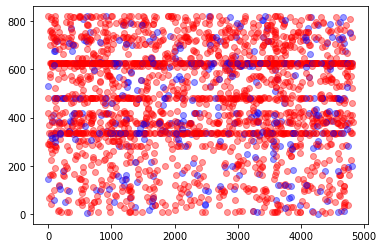

In [34]:
tm_vectorizer = CountVectorizer(stop_words="english")

term_matrix_train = tm_vectorizer.fit_transform(x_train)
term_matrix_test = tm_vectorizer.transform(x_test)

plt.figure(figsize=(10, 8))# Plotting our two-features-space
mtrx_dict = term_matrix_train.todok()
xy = list(mtrx_dict.keys())

colors=["#FF0000", "#0000FF"]

fig = plt.figure()
ax = fig.add_subplot()

LIMIT = 2500
data = random.sample(list(zip(xy, y_train)), LIMIT)
for i in range(len(data)):
    ax.scatter(x=data[i][0][0], y=data[i][0][1], color=colors[data[i][1]], alpha=0.4)
plt.show()

# Support-Vector Machine

In [35]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, max_iter=5000, verbose=True)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)

[LibLinear]............................*.........*
optimization finished, #iter = 379
Objective value = -434.303720
nSV = 2361


Document-term Matrix(Count Vectorizer) - SVM/SVC
              precision    recall  f1-score   support

   Unhelpful       0.88      0.92      0.90      1363
     Helpful       0.42      0.32      0.36       244

    accuracy                           0.83      1607
   macro avg       0.65      0.62      0.63      1607
weighted avg       0.81      0.83      0.82      1607
 
Balanced acc score:  0.62153 
Balanced acc score(luck adjusted):  0.24307
Youden Index:  0.24307


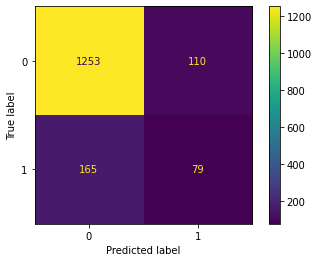

In [36]:
summary_report(y_test, y_test_pred, "Document-term Matrix(Count Vectorizer) - SVM/SVC")

# Neural Network

In [37]:
from sklearn.neural_network import MLPClassifier

# Using lbfgs over adam as it is much faster on smaller datasets(1min vs 6min(42k samples on M1 macbook air))
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), max_iter=500, random_state=1)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)

Document-term Matrix(Count Vectorizer) - Multi-layer Perceptron (MLP)
              precision    recall  f1-score   support

   Unhelpful       0.89      0.93      0.91      1363
     Helpful       0.46      0.34      0.40       244

    accuracy                           0.84      1607
   macro avg       0.68      0.64      0.65      1607
weighted avg       0.82      0.84      0.83      1607
 
Balanced acc score:  0.63655 
Balanced acc score(luck adjusted):  0.2731
Youden Index:  0.2731


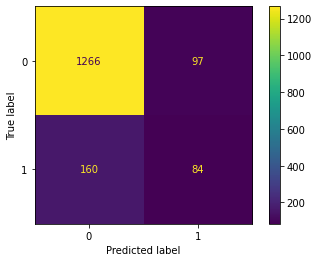

In [38]:
summary_report(y_test, y_test_pred, "Document-term Matrix(Count Vectorizer) - Multi-layer Perceptron (MLP)")

# KMeans clustering

MLPClassifier
              precision    recall  f1-score   support

   Unhelpful       0.00      0.00      0.00      1363
     Helpful       0.15      1.00      0.26       244

    accuracy                           0.15      1607
   macro avg       0.08      0.50      0.13      1607
weighted avg       0.02      0.15      0.04      1607
 
Balanced acc score:  0.5 
Balanced acc score(luck adjusted):  0.0
Youden Index:  0.0


/Users/frederikvincentprimdahl/Library/Caches/pypoetry/virtualenvs/amazon-sentiment-eV3x1PQ_-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/frederikvincentprimdahl/Library/Caches/pypoetry/virtualenvs/amazon-sentiment-eV3x1PQ_-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/frederikvincentprimdahl/Library/Caches/pypoetry/virtualenvs/amazon-sentiment-eV3x1PQ_-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision 

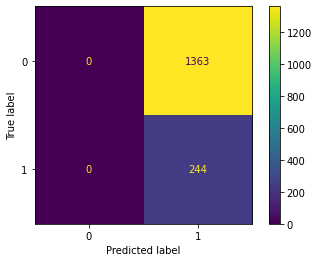

In [39]:
clf = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1,random_state=5)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)

summary_report(y_test, y_test_pred, "MLPClassifier")